
## About Dataset
### Context
The original dataset contains 1000 entries with 20 categorial/symbolic attributes prepared by Prof. Hofmann. In this dataset, each entry represents a person who takes a credit by a bank. Each person is classified as good or bad credit risks according to the set of attributes. The link to the original dataset can be found below.

### Content
It is almost impossible to understand the original dataset due to its complicated system of categories and symbols. Thus, I wrote a small Python script to convert it into a readable CSV file. Several columns are simply ignored, because in my opinion either they are not important or their descriptions are obscure. The selected attributes are:

1. Age (numeric)
2. Sex (text: male, female)
3. Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)
4. Housing (text: own, rent, or free)
5. Saving accounts (text - little, moderate, quite rich, rich)
6. Checking account (numeric, in DM - Deutsch Mark)
7. Credit amount (numeric, in DM)
8. Duration (numeric, in month)
9. Purpose (text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others)

Acknowledgements
Source: [UCI](https://archive.ics.uci.edu/ml/datasets/Statlog+%28German+Credit+Data%29)

### Importing Modules

In [2]:
import pandas as pd
import plotly.express as px
import plotly.graph_objs as go
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
import plotly.offline as po
po.init_notebook_mode(connected=True)
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

### Load and Preview Data

In [3]:
credit = pd.read_csv('German Credit Risk - With Target/german_credit_data.csv', index_col=0)
credit

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,40,male,3,own,little,little,3857,30,car,good
997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [4]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 85.9+ KB


In [5]:
credit.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0
Job,1000.0,1.904,0.653614,0.0,2.0,2.0,2.00,3.0
Credit amount,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
Duration,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0


In [6]:
credit.nunique()

Age                  53
Sex                   2
Job                   4
Housing               3
Saving accounts       4
Checking account      3
Credit amount       921
Duration             33
Purpose               8
Risk                  2
dtype: int64

In [7]:
credit.columns = [x.lower().replace(' ', '_') for x in credit.columns]
credit.head(3)

,age,sex,job,housing,saving_accounts,checking_account,credit_amount,duration,purpose,risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good


### EDA

In [8]:
risk_count = credit.risk.value_counts().reset_index(name='count')
risk_count


,index,count
0,good,700
1,bad,300


In [9]:
fig = px.bar(risk_count, 'index', 'count', color='index', labels={'count':'', 'index': ''},
       title='<b>Risk Distribution</b>', text_auto=True, width=700, height=600)
fig.update_yaxes(showticklabels=False)
fig.update_traces(textposition='outside', cliponaxis=False)


In [10]:
good_credit = credit[credit['risk'] == 'good']['age'].values.tolist()
bad_credit = credit[credit['risk'] == 'bad']['age'].values.tolist()
age_dist = credit['age']


In [11]:
trace1 = go.Histogram(
    x=good_credit,
    histnorm='probability',
    name='Good Credit'
)

trace2 = go.Histogram(
    x=bad_credit,
    histnorm='probability',
    name='Bad Crdit'
)

trace3 = go.Histogram(
    x=age_dist,
    histnorm='probability',
    name='Age [Overall]'
)

fig = make_subplots(
    rows=2, cols=2, specs=[[{}, {}], [{'colspan':2}, None]],
    subplot_titles=('Good', 'Bad', 'General Distribution')
)

fig.add_traces(trace1, 1,1)
fig.add_traces(trace2,1,2)
fig.add_traces(trace3, 2,1)

fig.update_layout(title='<b>Age Distribution by Risk</b>', bargap=0.02, width=700, height=600)
fig.show()


In [12]:
age_category = ['Student', 'Youth', 'Adult', 'Elderly']
credit['age_category'] = pd.cut(credit['age'], [18, 25, 35, 60, 120], labels=age_category)

good_cred = credit[credit['risk'] == 'good']
bad_cred = credit[credit['risk'] == 'bad']

In [13]:
def box_plot(cat, xtitle, cat1='credit_amount', ytitle='Credit Amount ($)'):
    trace1 = go.Box(
        x=good_cred[cat],
        y=good_cred[cat1],
        name='Good Credit',
    )

    trace2 = go.Box(
        x=bad_cred[cat],
        y=bad_cred[cat1],
        name='Bad Credit'
    )

    data = [trace1, trace2]

    layout = go.Layout(
        boxmode='group',
        xaxis={'title': f'<b>{xtitle}</b>'},
        yaxis={'title': f'<b>{ytitle}</b>'},
        title=f'<b>{ytitle} vs. {xtitle}</b>',
        width=700, height=600
    )

    fig = go.Figure(data=data, layout=layout)
    return fig

def barcount_plot(cat, xtitle):
    gud_huz_risk = credit[credit['risk'] == 'good'][cat].value_counts()
    bad_huz_risk = credit[credit['risk'] == 'bad'][cat].value_counts()
    trace1 = go.Bar(
        x=gud_huz_risk.index,
        y=gud_huz_risk.values,
        name='Good Credit',
        text=gud_huz_risk.values,
        textfont={'size':13},
        textposition='outside'
    )

    trace2 = go.Bar(
        x=bad_huz_risk.index,
        y=bad_huz_risk.values,
        name='Bad Credit',
        text=bad_huz_risk.values,
        textposition='outside',
        textfont={'size':13}
    )

    data = [trace1, trace2]

    layout = go.Layout(
        title=f'<b>{xtitle} Distribution by Risk</b>',
        width=700, height=600,
        xaxis={'title': f'<b>{xtitle}</b>', 'tickfont':{'size':15}}, yaxis={'showticklabels': False},
    )

    fig = go.Figure(data=data, layout=layout)
    return fig

def violin_plot(cat1, cat2, xtitle, ytitle):
    trace1 = go.Violin(
        x=good_cred[cat1],
        y=good_cred[cat2],
        side='negative',
        name='<b>Good Credit</b>',
        box={'visible': True},
        meanline={'visible': True}
    )

    trace2 = go.Violin(
        x=bad_cred[cat1],
        y=bad_cred[cat2],
        side='positive',
        name='<b>Bad Credit</b>',
        box={'visible': True},
        meanline={'visible': True}
    )

    data = [trace1, trace2]

    layout = go.Layout(
        violingap=0.3, 
        width=1000, height=600, 
        title=f'<b>{ytitle} vs. {xtitle}</b>',
        yaxis={'title':f'<b>{ytitle}</b>', 'zeroline':False},
        xaxis={'title':f'<b>{xtitle}</b>'},
        violinmode='overlay'
    )

    fig = go.Figure(data=data, 
                    layout=layout
                    )
    fig.show()
    

In [14]:
box_plot('age_category', 'Age Category')

In [15]:
barcount_plot('housing', 'Housing')

In [16]:
violin_plot('housing', 'credit_amount', 'Housing', 'Credit Amount')

In [17]:
barcount_plot('sex', 'Gender')

In [18]:
box_plot('sex', 'Gender')

In [19]:
barcount_plot('job', 'Job')

In [20]:
box_plot('job', 'Job')

In [21]:
violin_plot('job', 'age', 'Job', 'Age')

In [22]:
px.histogram(credit, 'credit_amount', color='risk', histnorm='probability',)

In [23]:
data1 = np.log(good_cred['credit_amount'])
data2 = np.log(bad_cred['credit_amount'])

datas = [data1, data2]
labels = ['Good Credit', 'Bad Credit']

fig = ff.create_distplot(datas, labels)
fig.show()

In [24]:
box_plot('saving_accounts', 'Saving Account')

In [25]:
barcount_plot('saving_accounts', 'Saving Account')

In [26]:
box_plot('saving_accounts', 'Saving Account', 'age', 'Age')

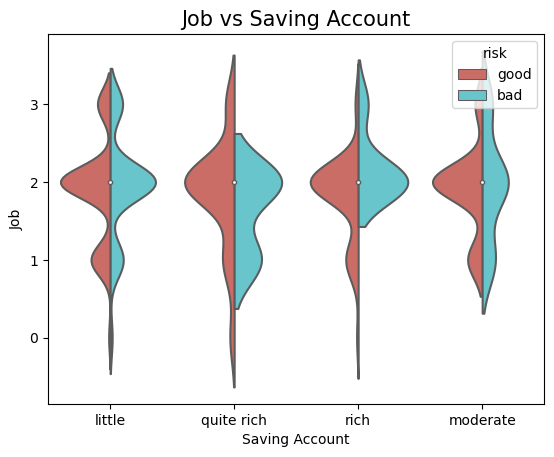

In [27]:
sb.violinplot(credit, x='saving_accounts', y='job', hue='risk', split=True,
              palette='hls')
plt.xlabel('Saving Account')
plt.ylabel('Job')
plt.title('Job vs Saving Account', fontdict={'size': 15})
plt.show()

In [28]:
barcount_plot('purpose', 'Purpose')

In [29]:
fig = violin_plot('purpose', 'age', 'Purpose', 'Age')
# fig.update_layout(width=1000)

In [30]:
fig = box_plot('purpose', 'Purpose', 'age', 'Age')
fig.update_layout(width=1000)

In [31]:
credit_c = credit.copy()
credit_c.head()

,age,sex,job,housing,saving_accounts,checking_account,credit_amount,duration,purpose,risk,age_category
0,67,male,2,own,NaN,little,1169,6,radio/TV,good,Elderly
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad,Student
2,49,male,1,own,little,NaN,2096,12,education,good,Adult
3,45,male,2,free,little,little,7882,42,furniture/equipment,good,Adult
4,53,male,2,free,little,little,4870,24,car,bad,Adult


In [32]:
num_cols = [col for col in credit_c.columns if pd.api.types.is_numeric_dtype(credit_c[col])]
num_cols

['age', 'job', 'credit_amount', 'duration']

In [33]:
for col in num_cols:
    fig = px.box(credit_c, col, title=f'<b>{col.upper()}</b>', width=500, height=500)
    fig.show()

In [34]:
cate = ['saving_accounts', 'checking_account']
for x in cate:
    credit_c[x] = credit_c[x].fillna(credit_c[x].mode()[0])

In [35]:
def outlier_limit(df, col):
    q1 = df[col].quantile(.25)
    q3 = df[col].quantile(.75)
    iqr = q3 - q1
    upper_limit = q3 + (1.5 * iqr)
    lower_limit = q1 - (1.5 * iqr)
    return lower_limit, upper_limit

def replace_outlier_with_limit(df, col):
    lower, upper = outlier_limit(df, col)
    df.loc[(df[col] < lower), col] = lower
    df.loc[(df[col] > upper), col] = upper
   

In [36]:
for col in num_cols:
    replace_outlier_with_limit(credit_c, col)

In [37]:
for col in num_cols:
    fig = px.box(credit_c, col, title=f'<b>{col.upper()}</b>', width=500, height=500)
    fig.show()

In [38]:
q1 = credit_c['duration'].quantile(.25)
q3 = credit_c['duration'].quantile(.75)
iqr = q3 - q1
upper_limit = q3 + (1.5 * iqr)
lower_limit = q1 - (1.5 * iqr)


In [39]:
lower_limit, upper_limit

(-6.0, 42.0)

In [40]:
credit_c.loc[(credit_c['duration'] < lower_limit), 'duration']
dd = credit_c.loc[(credit_c['duration'] > upper_limit), 'duration'] = upper_limit


In [41]:
credit_c = credit_c.merge(pd.get_dummies(credit_c['purpose'], drop_first=True, prefix='pur'), left_index=True, right_index=True)\
            .merge(pd.get_dummies(credit_c['sex'], drop_first='True', prefix='sex'), left_index=True, right_index=True)\
                .merge(pd.get_dummies(credit_c['housing'], drop_first=True, prefix='huz'), left_index=True, right_index=True)\
                    .merge(pd.get_dummies(credit_c['saving_accounts'], drop_first='True', prefix='sa'), left_index=True, right_index=True)\
                        .merge(pd.get_dummies(credit_c['risk'], prefix='risk'), left_index=True, right_index=True)\
                            .merge(pd.get_dummies(credit_c['checking_account'], drop_first=True, prefix='ca'), left_index=True, right_index=True)\
                                .merge(pd.get_dummies(credit_c['age_category'], drop_first=True, prefix='ac'), left_index=True, right_index=True)

In [42]:
credit_c.columns

Index(['age', 'sex', 'job', 'housing', 'saving_accounts', 'checking_account',
       'credit_amount', 'duration', 'purpose', 'risk', 'age_category',
       'pur_car', 'pur_domestic appliances', 'pur_education',
       'pur_furniture/equipment', 'pur_radio/TV', 'pur_repairs',
       'pur_vacation/others', 'sex_male', 'huz_own', 'huz_rent', 'sa_moderate',
       'sa_quite rich', 'sa_rich', 'risk_bad', 'risk_good', 'ca_moderate',
       'ca_rich', 'ac_Youth', 'ac_Adult', 'ac_Elderly'],
      dtype='object')

In [43]:
old_col = ['purpose', 'sex', 'housing', 'saving_accounts', 'risk', 'checking_account', 'age_category', 'risk_good']
credit_c.drop(columns=old_col, inplace=True)

In [44]:
like_num = [col for col in credit_c.columns if pd.api.types.is_numeric_dtype(credit_c[col]) and len(credit_c[col].value_counts()) < 20]
like_num

['job',
 'pur_car',
 'pur_domestic appliances',
 'pur_education',
 'pur_furniture/equipment',
 'pur_radio/TV',
 'pur_repairs',
 'pur_vacation/others',
 'sex_male',
 'huz_own',
 'huz_rent',
 'sa_moderate',
 'sa_quite rich',
 'sa_rich',
 'risk_bad',
 'ca_moderate',
 'ca_rich',
 'ac_Youth',
 'ac_Adult',
 'ac_Elderly']

In [45]:
cols_need_scale = [col for col in credit_c.columns if col not in "Id"
                   and col not in "Risk"
                   and col not in like_num]
cols_need_scale

['age', 'credit_amount', 'duration']

In [46]:
credit_c[cols_need_scale].describe([0.05, 0.10, 0.25, 0.50, 0.75, 0.80, 0.90, 0.95, 0.99]).T


,count,mean,std,min,5%,10%,25%,50%,75%,80%,90%,95%,99%,max
age,1000.0,35.4535,11.106324,19.0,22.00,23.0,27.0,33.0,42.00,45.0,52.0,60.000,64.500,64.500
credit_amount,1000.0,3051.1010,2187.140403,250.0,708.95,932.0,1365.5,2319.5,3972.25,4720.0,7179.4,7882.375,7882.375,7882.375
duration,1000.0,20.3070,10.615151,4.0,6.00,9.0,12.0,18.0,24.00,30.0,36.0,42.000,42.000,42.000


In [47]:
for col in cols_need_scale:
    fig = px.histogram(credit_c, col)
    fig.show()

In [48]:
def scaler(col):
    col_med = col.median()
    q1 = col.quantile(.25)
    q3 = col.quantile(.75)
    iqr = q3 - q1
    if int(iqr) == 0:
        q1 = col.quantile(.05)
        q3 = col.quantile(.95)
        iqr = q3 - q1
        z = (col - col_med) / iqr
        return round(z, 3)
    else:
        z = (col - col_med) / iqr
    return round(z, 3)

In [49]:
for col in cols_need_scale:
    credit_c[col] = scaler(credit_c[col])

In [50]:
for col in cols_need_scale:
    fig = px.histogram(credit_c, col)
    fig.show()

In [52]:
correlation = credit_c.corr()

In [53]:
px.imshow(correlation, width=1200, height=1200, text_auto='.2f')

In [54]:

from sklearn.model_selection import GridSearchCV, train_test_split, KFold, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, fbeta_score, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.utils import resample

In [55]:
X = credit_c.drop(columns='risk_bad').values
y = credit_c['risk_bad'].values

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

In [60]:
models = [('LR', LogisticRegression(max_iter=1000)), ('RF', RandomForestClassifier()), ('KNN', KNeighborsClassifier()), ('DTC', DecisionTreeClassifier()),
          ('XGB', XGBClassifier()), ('LDA', LinearDiscriminantAnalysis()), ('SVM', SVC(gamma='auto')), ('NB', GaussianNB())]

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=7, shuffle=True)
    cv_res = cross_val_score(model, X_train, y_train, cv=kfold, scoring='recall')
    results.append(cv_res)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_res.mean(), cv_res.std())
    print(msg)

LR: 0.272724 (0.104171)
RF: 0.300910 (0.088492)
KNN: 0.276635 (0.107262)
DTC: 0.450573 (0.072295)
XGB: 0.333187 (0.061382)
LDA: 0.274640 (0.102902)
SVM: 0.000000 (0.000000)
NB: 0.542452 (0.126091)


In [61]:
results

[array([0.36      , 0.375     , 0.19230769, 0.10714286, 0.3       ,
        0.18181818, 0.43478261, 0.14285714, 0.3       , 0.33333333]),
 array([0.48      , 0.25      , 0.34615385, 0.14285714, 0.3       ,
        0.22727273, 0.30434783, 0.23809524, 0.35      , 0.37037037]),
 array([0.44      , 0.1875    , 0.26923077, 0.21428571, 0.1       ,
        0.22727273, 0.26086957, 0.28571429, 0.3       , 0.48148148]),
 array([0.48      , 0.5625    , 0.38461538, 0.39285714, 0.45      ,
        0.40909091, 0.34782609, 0.57142857, 0.5       , 0.40740741]),
 array([0.4       , 0.25      , 0.30769231, 0.25      , 0.35      ,
        0.27272727, 0.43478261, 0.33333333, 0.4       , 0.33333333]),
 array([0.32      , 0.375     , 0.15384615, 0.10714286, 0.3       ,
        0.18181818, 0.43478261, 0.19047619, 0.35      , 0.33333333]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0.56      , 0.5625    , 0.42307692, 0.25      , 0.65      ,
        0.45454545, 0.65217391, 0.66666667, 0.65      

In [62]:
# fig = px.box(y=results)
# fig.update_xaxes(tickmode="array", tickvals=names)

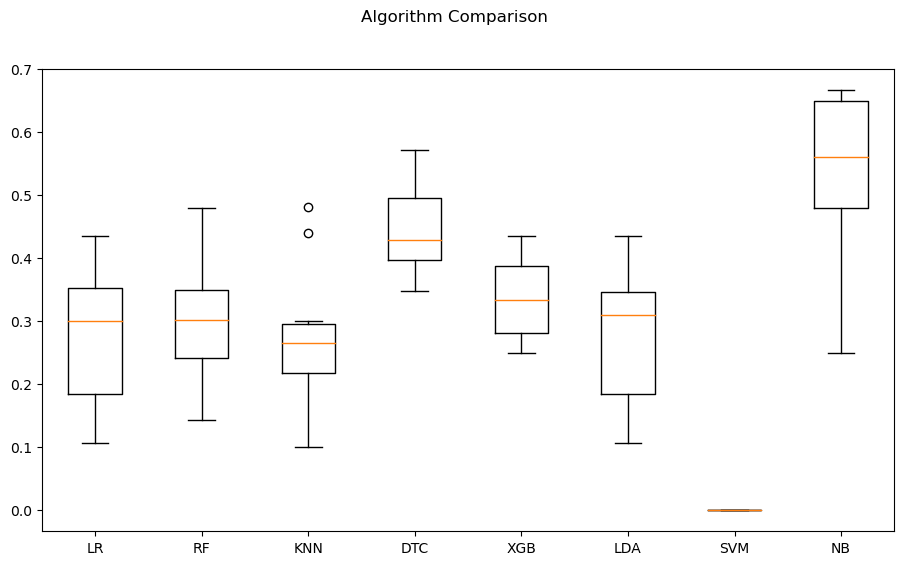

In [63]:
fig = plt.figure(figsize=(11,6))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [66]:
param_grid = {"max_depth": [3, 5, 7, 9, None],
              "n_estimators": [3, 6, 9, 13, 50, 100],
              "max_features": [2, 4, 6, 7, 10, 15]
              }

model = RandomForestClassifier(random_state=4)

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='recall', verbose=1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=4),
             param_grid={'max_depth': [3, 5, 7, 9, None],
                         'max_features': [2, 4, 6, 7, 10, 15],
                         'n_estimators': [3, 6, 9, 13, 50, 100]},
             scoring='recall', verbose=1)

In [67]:
print(grid_search.best_score_)
print(grid_search.best_params_)

0.398743961352657
{'max_depth': None, 'max_features': 6, 'n_estimators': 3}


In [68]:
rfc = RandomForestClassifier(max_depth=None, max_features=6, n_estimators=3)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_features=6, n_estimators=3)

In [86]:
y_pred = rfc.predict(X_test)
accuracy_score(y_true=y_test, y_pred=y_pred)

0.672

In [87]:
rfc.score(X_test, y_test)

0.672

In [88]:
confusion_matrix(y_test, y_pred)

array([[144,  34],
       [ 48,  24]], dtype=int64)

In [89]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.81      0.78       178
           1       0.41      0.33      0.37        72

    accuracy                           0.67       250
   macro avg       0.58      0.57      0.57       250
weighted avg       0.65      0.67      0.66       250



In [90]:
fbeta_score(y_test, y_pred, beta=2)

0.34682080924855496

In [91]:
gnb = GaussianNB()

model2 = gnb.fit(X_train, y_train) 
model2.score(X_train, y_train)

0.676

In [92]:
y_pred = model2.predict(X_test)
accuracy_score(y_test, y_pred)

0.62

In [93]:
confusion_matrix(y_test, y_pred)

array([[122,  56],
       [ 39,  33]], dtype=int64)

In [94]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.76      0.69      0.72       178
           1       0.37      0.46      0.41        72

    accuracy                           0.62       250
   macro avg       0.56      0.57      0.56       250
weighted avg       0.65      0.62      0.63       250



In [ ]:
y+

In [95]:
credit_c.head()
# print(credit_c.shape)

,age,job,credit_amount,duration,pur_car,pur_domestic appliances,pur_education,pur_furniture/equipment,pur_radio/TV,pur_repairs,...,huz_rent,sa_moderate,sa_quite rich,sa_rich,risk_bad,ca_moderate,ca_rich,ac_Youth,ac_Adult,ac_Elderly
0,2.100,2,-0.441,-1.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,-0.733,2,1.393,2.0,0,0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,0
2,1.067,2,-0.086,-0.5,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0.800,2,2.134,2.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1.333,2,0.978,0.5,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
